In [5]:
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv("../data/cleaned_data.csv", index_col=0)
df.head()

,Author,Year,User Rating,Reviews,Name,Price,Genre
0,Abraham Verghese,2010,4.6,4866,Cutting for Stone,11.0,Fiction
1,Abraham Verghese,2011,4.6,4866,Cutting for Stone,11.0,Fiction
2,Adam Gasiewski,2017,4.4,3113,Milk and Vine: Inspirational Quotes From Class...,6.0,Non Fiction
3,Adam Mansbach,2011,4.8,9568,Go the F**k to Sleep,9.0,Fiction
4,Adir Levy,2019,4.8,8170,What Should Danny Do? (The Power to Choose Ser...,13.0,Fiction


<Axes: xlabel='Price', ylabel='Count'>

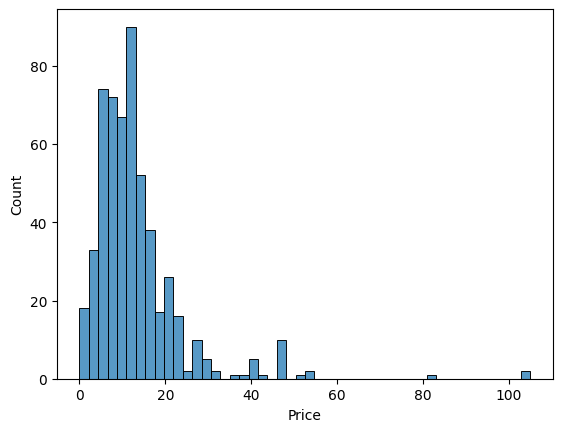

In [6]:
# Wie sind eigentlich die Preise verteilt

sns.histplot(df, x="Price")

,Year,User Rating,Reviews,Price
count,546.000000,546.000000,546.000000,546.000000
mean,2014.014652,4.617399,11858.560440,13.114469
std,3.166882,0.227490,11629.168907,10.871273
min,2009.000000,3.300000,37.000000,0.000000
25%,2011.000000,4.500000,4023.500000,7.000000
50%,2014.000000,4.700000,8535.500000,11.000000
75%,2017.000000,4.800000,17030.500000,16.000000
max,2019.000000,4.900000,87841.000000,105.000000
